# Customer Segmentation using Clustering

**Problem Statement:** Implement K-Means and Hierarchical clustering on the sales dataset to segment customers.

**Objectives:**
1. Pre-process and explore the sales data.
2. Determine the optimal number of clusters using the Elbow Method and Silhouette Score.
3. Apply the K-Means algorithm to segment the data.
4. Apply Hierarchical clustering as an alternative approach.
5. Analyze and visualize the resulting clusters to understand customer profiles.

## Imports
Import necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Loading and Initial Exploration

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# Check for missing values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### 2. Feature Selection and Scaling

Clustering algorithms are sensitive to the scale of data. We select our numerical features and standardize them (mean=0, std=1) using StandardScaler.

In [6]:
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
df_cluster = df[features].copy()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
df_scaled = scaler.fit_transform(df_cluster)

### 3. Determine Optimal k (Elbow Method)
To find the best number of clusters for K-Means, we use the elbow method. We calculate the Within-Cluster Sum of Squares (WCSS or inertia) for $k$ from 1 to 10. The "elbow" point, where the rate of decrease in inertia slows down, indicates the optimal $k$.

In [10]:
from sklearn.cluster import KMeans

In [11]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

([<matplotlib.axis.XTick at 0x2473df2be90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

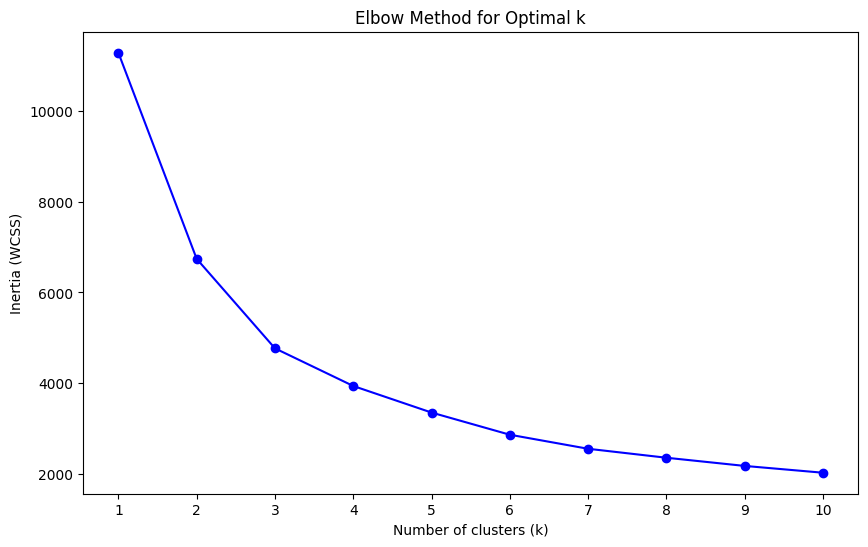

In [12]:
# Plotting the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)

Note: By observing the plot (or the inertia values printed in the execution), the "elbow" is clearly visible at k=3. After this point, the decrease in inertia becomes much less significant.

### 4. K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
optimal_k = 3

In [15]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)

In [16]:
cluster_labels_kmeans = kmeans.fit_predict(df_scaled)

In [17]:
# Add cluster labels to the original DataFrame
df['KMeans_Cluster'] = cluster_labels_kmeans
print(f"K-Means clustering applied with k=3. Cluster counts:\n{df['KMeans_Cluster'].value_counts()}")

K-Means clustering applied with k=3. Cluster counts:
KMeans_Cluster
2    996
0    975
1    852
Name: count, dtype: int64


Text(0, 0.5, 'Quantity Ordered')

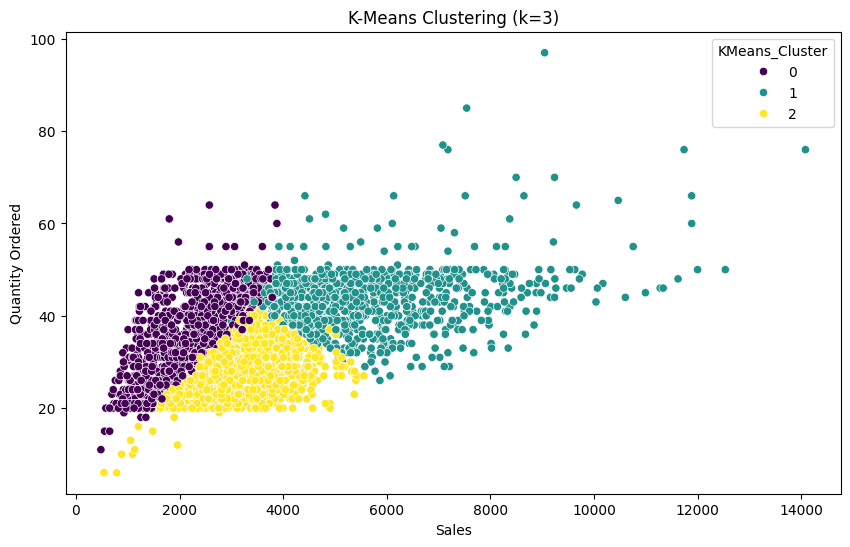

In [18]:
#Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SALES', y='QUANTITYORDERED', hue='KMeans_Cluster', palette='viridis', legend='full')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')

### 5. Hierarchical Clustering

### 5.1: Dendrogram
Now we perform hierarchical clustering. We first generate a dendrogram to visualize the cluster hierarchy. We use the 'ward' linkage method, which minimizes variance within clusters. The dendrogram is truncated for readability.

In [19]:
import scipy.cluster.hierarchy as sch

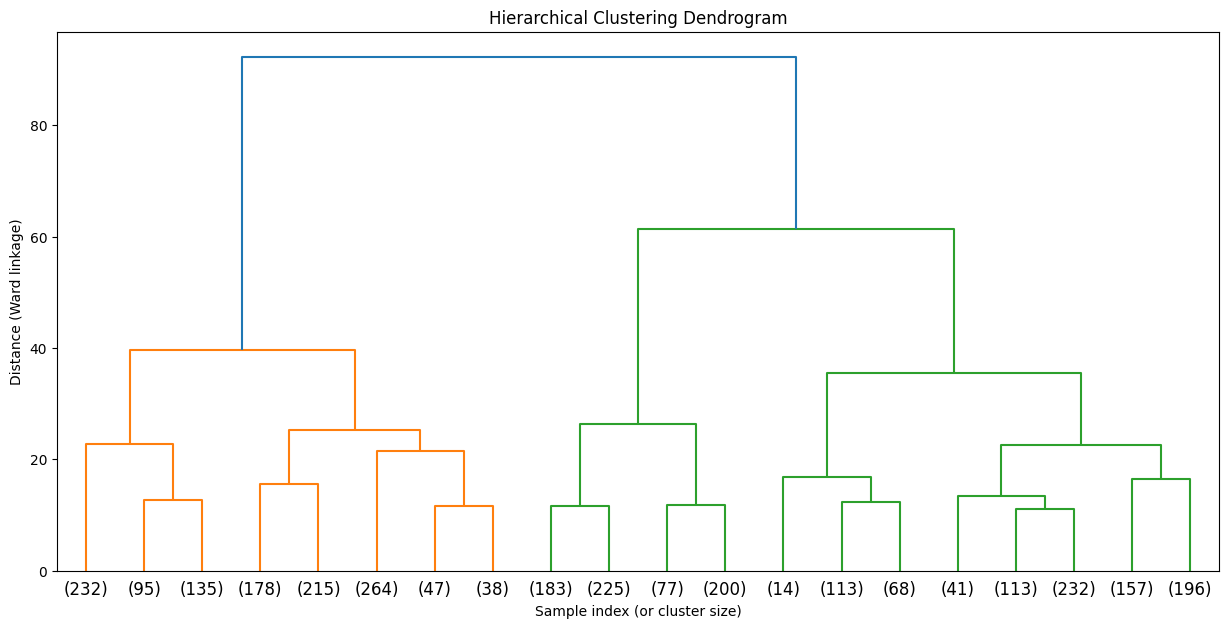

In [26]:
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index (or cluster size)')
plt.ylabel('Distance (Ward linkage)')

# Generate the linkage matrix
linkage_matrix = sch.linkage(df_scaled, method='ward')

# Plot the dendrogram
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=20) # Show only the last 20 merges
plt.show()

### 5.1: Hierarchical Clustering model

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [22]:
hc = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')

In [23]:
df['Hierarchical_Cluster'] = hc.fit_predict(df_scaled)

In [24]:
print(f"Hierarchical clustering applied with k=3. Cluster counts:\n{df['Hierarchical_Cluster'].value_counts()}")

Hierarchical clustering applied with k=3. Cluster counts:
Hierarchical_Cluster
0    1204
1     934
2     685
Name: count, dtype: int64


Text(0, 0.5, 'Quantity Ordered')

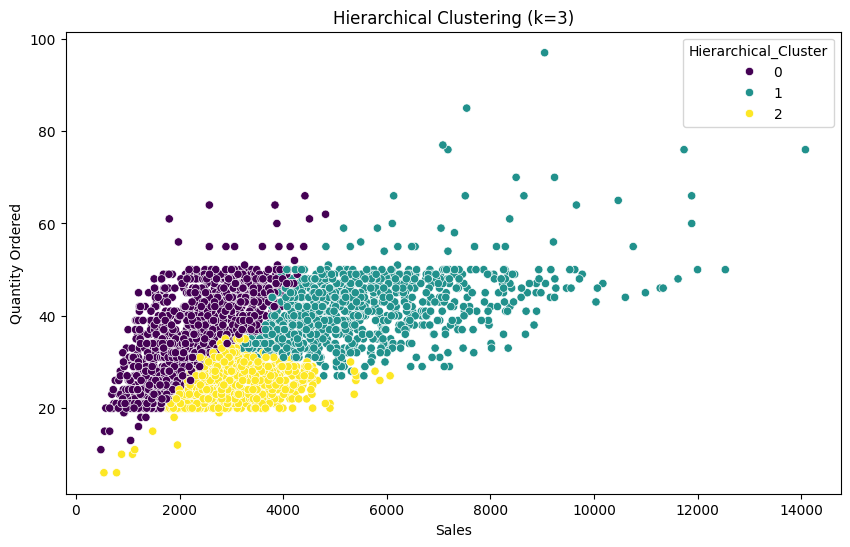

In [25]:
#Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SALES', y='QUANTITYORDERED', hue='Hierarchical_Cluster', palette='viridis', legend='full')
plt.title(f'Hierarchical Clustering (k={optimal_k})')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')

# Notes

### 1. Unsupervised Learning: Clustering

* **Introduction:**
    **Unsupervised Learning** is a type of machine learning where the algorithm learns patterns from data that has not been labeled or classified. The goal is not to predict an output, but to find the underlying structure or distribution in the data.

    **Clustering** is a primary task in unsupervised learning. It is the process of grouping a set of data points in such a way that points in the same group (or **cluster**) are more similar to each other than to those in other groups.

* **Why Used in this Notebook:**
    We used clustering to segment the sales data. Instead of looking at individual sales, we grouped them into distinct categories (e.g., "high-value, high-quantity", "low-value", etc.). This allows a business to understand its customer behavior and sales patterns at a higher level, which can inform marketing, inventory, and strategy.

---

### 2. Feature Scaling: StandardScaler

* **Introduction:**
    **Feature Scaling** is a data preprocessing step used to normalize the range of independent features. **StandardScaler** is a specific method that transforms the data so that it has a mean ($\mu$) of 0 and a standard deviation ($\sigma$) of 1.

* **Why Used:**
    Clustering algorithms like K-Means and Hierarchical Clustering are **distance-based**. They use metrics like Euclidean distance to determine similarity.

    In our dataset, `SALES` (e.g., 2871.00) has a much larger scale than `QUANTITYORDERED` (e.g., 30). Without scaling, the `SALES` feature would completely dominate the distance calculation, and the `QUANTITYORDERED` feature would be ignored. StandardScaler ensures that all features (`SALES`, `MSRP`, `PRICEEACH`, `QUANTITYORDERED`) contribute equally to the clustering process.

* **Formula (Standardization):**
    The formula for each value $x$ in a feature is:
    $z = \frac{(x - \mu)}{\sigma}$
    * $z$ is the new, scaled value.
    * $x$ is the original value.
    * $\mu$ is the mean of the feature.
    * $\sigma$ is the standard deviation of the feature.

---

### 3. K-Means Clustering

* **Introduction:**
    K-Means is a **partitional**, **centroid-based** clustering algorithm.
    * **Partitional:** It divides the dataset into $k$ distinct, non-overlapping clusters.
    * **Centroid-based:** It represents each cluster by its center point, or **centroid** (the mean of all points in the cluster).

* **How it Works (Algorithm):**
    1.  **Initialize:** Choose $k$ (the number of clusters) and randomly initialize $k$ centroids in the data space.
    2.  **Assign:** Assign each data point to its nearest centroid, based on Euclidean distance. This forms $k$ clusters.
    3.  **Update:** Recalculate the position of each centroid by taking the mean of all data points assigned to that cluster.
    4.  **Iterate:** Repeat the **Assign** and **Update** steps until the centroids stop moving (or move very little), indicating that the clusters have stabilized (convergence).

* **Properties:**
    * **Pros:** It is simple, fast, and efficient for large datasets.
    * **Cons:** The number of clusters, $k$, must be specified in advance. It is sensitive to the initial random placement of centroids (which is why `n_init=10` is used—it runs the algorithm 10 times with different starting points and picks the best result). It tends to create spherical, evenly-sized clusters.

* **Objective Function (Formula):**
    K-Means' goal is to minimize the **Inertia**, also known as the **Within-Cluster Sum of Squares (WCSS)**. This is the sum of squared distances from each point to its assigned cluster's centroid.
    $WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$
    * $k$ = number of clusters.
    * $C_i$ = the $i$-th cluster.
    * $\mu_i$ = the centroid of cluster $C_i$.
    * $||x - \mu_i||^2$ = the squared Euclidean distance between point $x$ and centroid $\mu_i$.

---

### 4. The Elbow Method

* **Introduction:**
    The Elbow Method is a heuristic technique used to find the optimal number of clusters ($k$) for the K-Means algorithm.

* **Why Used:**
    K-Means does not determine $k$ on its own; it must be provided as an input. The Elbow Method offers a data-driven way to choose a "good" $k$.

* **How it Works:**
    1.  We run K-Means for a range of different $k$ values (e.g., $k$ from 1 to 10).
    2.  For each $k$, we calculate and record the WCSS (Inertia).
    3.  We plot $k$ on the x-axis versus WCSS on the y-axis.
    4.  The plot typically looks like an arm. The point where the rate of decrease in WCSS sharply slows down is the "elbow". This point (which we identified as **k=3** in our notebook) represents a good trade-off: adding more clusters beyond this point gives diminishing returns (i.e., it does not explain much more variance in the data).

---

### 5. Hierarchical Clustering (Agglomerative)

* **Introduction:**
    Hierarchical Clustering is an algorithm that builds a hierarchy of clusters. This notebook uses the **Agglomerative** (bottom-up) approach.

* **How it Works (Algorithm):**
    1.  **Start:** Begin by treating each data point as its own separate cluster.
    2.  **Merge:** Find the two closest clusters and merge them into a single new cluster.
    3.  **Iterate:** Repeat this merging process until only one single cluster (containing all data points) remains.
    The entire history of merges forms a tree-like structure called a dendrogram.

* **Properties:**
    * **Pros:** It does not require $k$ to be specified beforehand. The output (dendrogram) visualizes the entire hierarchy, which can be very informative.
    * **Cons:** It is computationally expensive (typically $O(n^3)$), making it slow for very large datasets. The merge decisions are final (greedy), which means a bad early merge cannot be undone.

* **Linkage Methods (How to measure distance between clusters):**
    The "Linkage" criterion determines how the distance between two clusters is calculated. The choice of linkage is critical.
    * **Ward (Used in this notebook):** This is the most common default. It merges the two clusters that result in the *minimum increase* in the total within-cluster variance. It is similar to the WCSS concept in K-Means and tends to produce well-sized, compact clusters.
    * **Single:** Uses the distance between the *closest* two points in the two clusters.
    * **Complete:** Uses the distance between the *farthest* two points in the two clusters.
    * **Average:** Uses the average distance between all pairs of points in the two clusters.

---

### 6. Dendrogram

* **Introduction:**
    A dendrogram is a tree-like diagram that is the primary output of hierarchical clustering. It illustrates the arrangement of the clusters produced by the algorithm.

* **Why Used:**
    It is used to visualize the merge history and to help decide the optimal number of clusters.

* **How to Read:**
    * **X-axis:** Represents the individual data points (or samples).
    * **Y-axis:** Represents the distance (or dissimilarity). The height of a "U" shape indicates the distance between the two clusters that were merged.
    * **Finding $k$:** To determine the number of clusters, you can draw a horizontal line across the dendrogram. The number of vertical lines this horizontal line intersects is the number of clusters at that distance threshold. We chose $k=3$ by "cutting" the dendrogram at a height that resulted in three distinct clusters, which also happened to align with the Elbow Method's finding.